**Problem Statement:**
The effect of eight input variables (relative compactness, surface area, wall area, roof area, overall height, orientation, glazing area, glazing area distribution) on two output variables, namely heating load (HL) and cooling load (CL), of residential buildings is investigated using a statistical machine learning framework. We have to use a number of classical and non-parametric statistical analytic tools to carefully analyse the strength of each input variable's correlation with each of the output variables in order to discover the most strongly associated input variables. We need to estimate HL and CL, we can compare a traditional linear regression approach to a sophisticated state-of-the-art nonlinear non-parametric method, random forests.

**Importing some basic necessary packages**

In [1]:
#Importing basic necessary packages
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
import warnings
warnings.filterwarnings("ignore")

**Data Loading**

In [2]:
os.chdir('/Users/harsha/Documents/INTERN/iNeuron/Project')
data_df = pd.read_csv('ENB2012_data.csv')

In [3]:
#Shape of the data
print ('No. of Features : ', data_df.shape[1])
print ('No. of Rows : ',data_df.shape[0])

No. of Features :  12
No. of Rows :  768


In [4]:
data_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,NaN,NaN


Renaming the eight input variables (X1,X2,X3...,X8) and two output variables (Y1,Y2) in this dataset aims to enhance its descriptiveness and intuitiveness, thereby improving the dataset's readability and simplifying its use for data analysis. where as, the extra variables ('Unnamed: 10', 'Unnamed: 11') maybe any error value entered during data collection process (or) exporting it into CSV file which can observed and removed later for further analysis

In [5]:
df_cols = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area','Overall Height', 'Orientation', 
'Glazing Area','Glazing Area Distribution','Heating Load', 'Cooling Load','Unnamed: 10', 'Unnamed: 11']

In [6]:
data_df.columns = df_cols

**Data Exploration and Cleaning**

In [7]:
# Basic information about data types and missing values
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
 10  Unnamed: 10                0 non-null      float64
 11  Unnamed: 11                0 non-null      float64
dtypes: float64(10), int64(2)
memory usage: 72.1 KB


* Upon inspection, both columns "Unnamed: 10" and "Unnamed: 11" appeared to contain only NaN (not a number) values. 
This was confirmed when reviewing the data information, which showed 0 non-null entries out of 768 for these 
columns.
* These columns are likely the result of an error in data collection, formatting, or exporting to CSV. They don't have a name or any descriptive information indicating what they might represent, and with all values missing, they provide no useful information for analysis or modeling.
* Keeping these entirely empty columns could lead to errors or misinterpretations in further data analysis, visualization, or modeling steps. 

-- Therefore, removing them helps maintain the quality and integrity of the dataset by focusing only on meaningful and informative data.


In [8]:
# Dropping irrelevant columns
data = data_df.drop(columns=['Unnamed: 10', 'Unnamed: 11'])

In [9]:
# Descriptive statistics of the dataset
data.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


**Data Visualization**

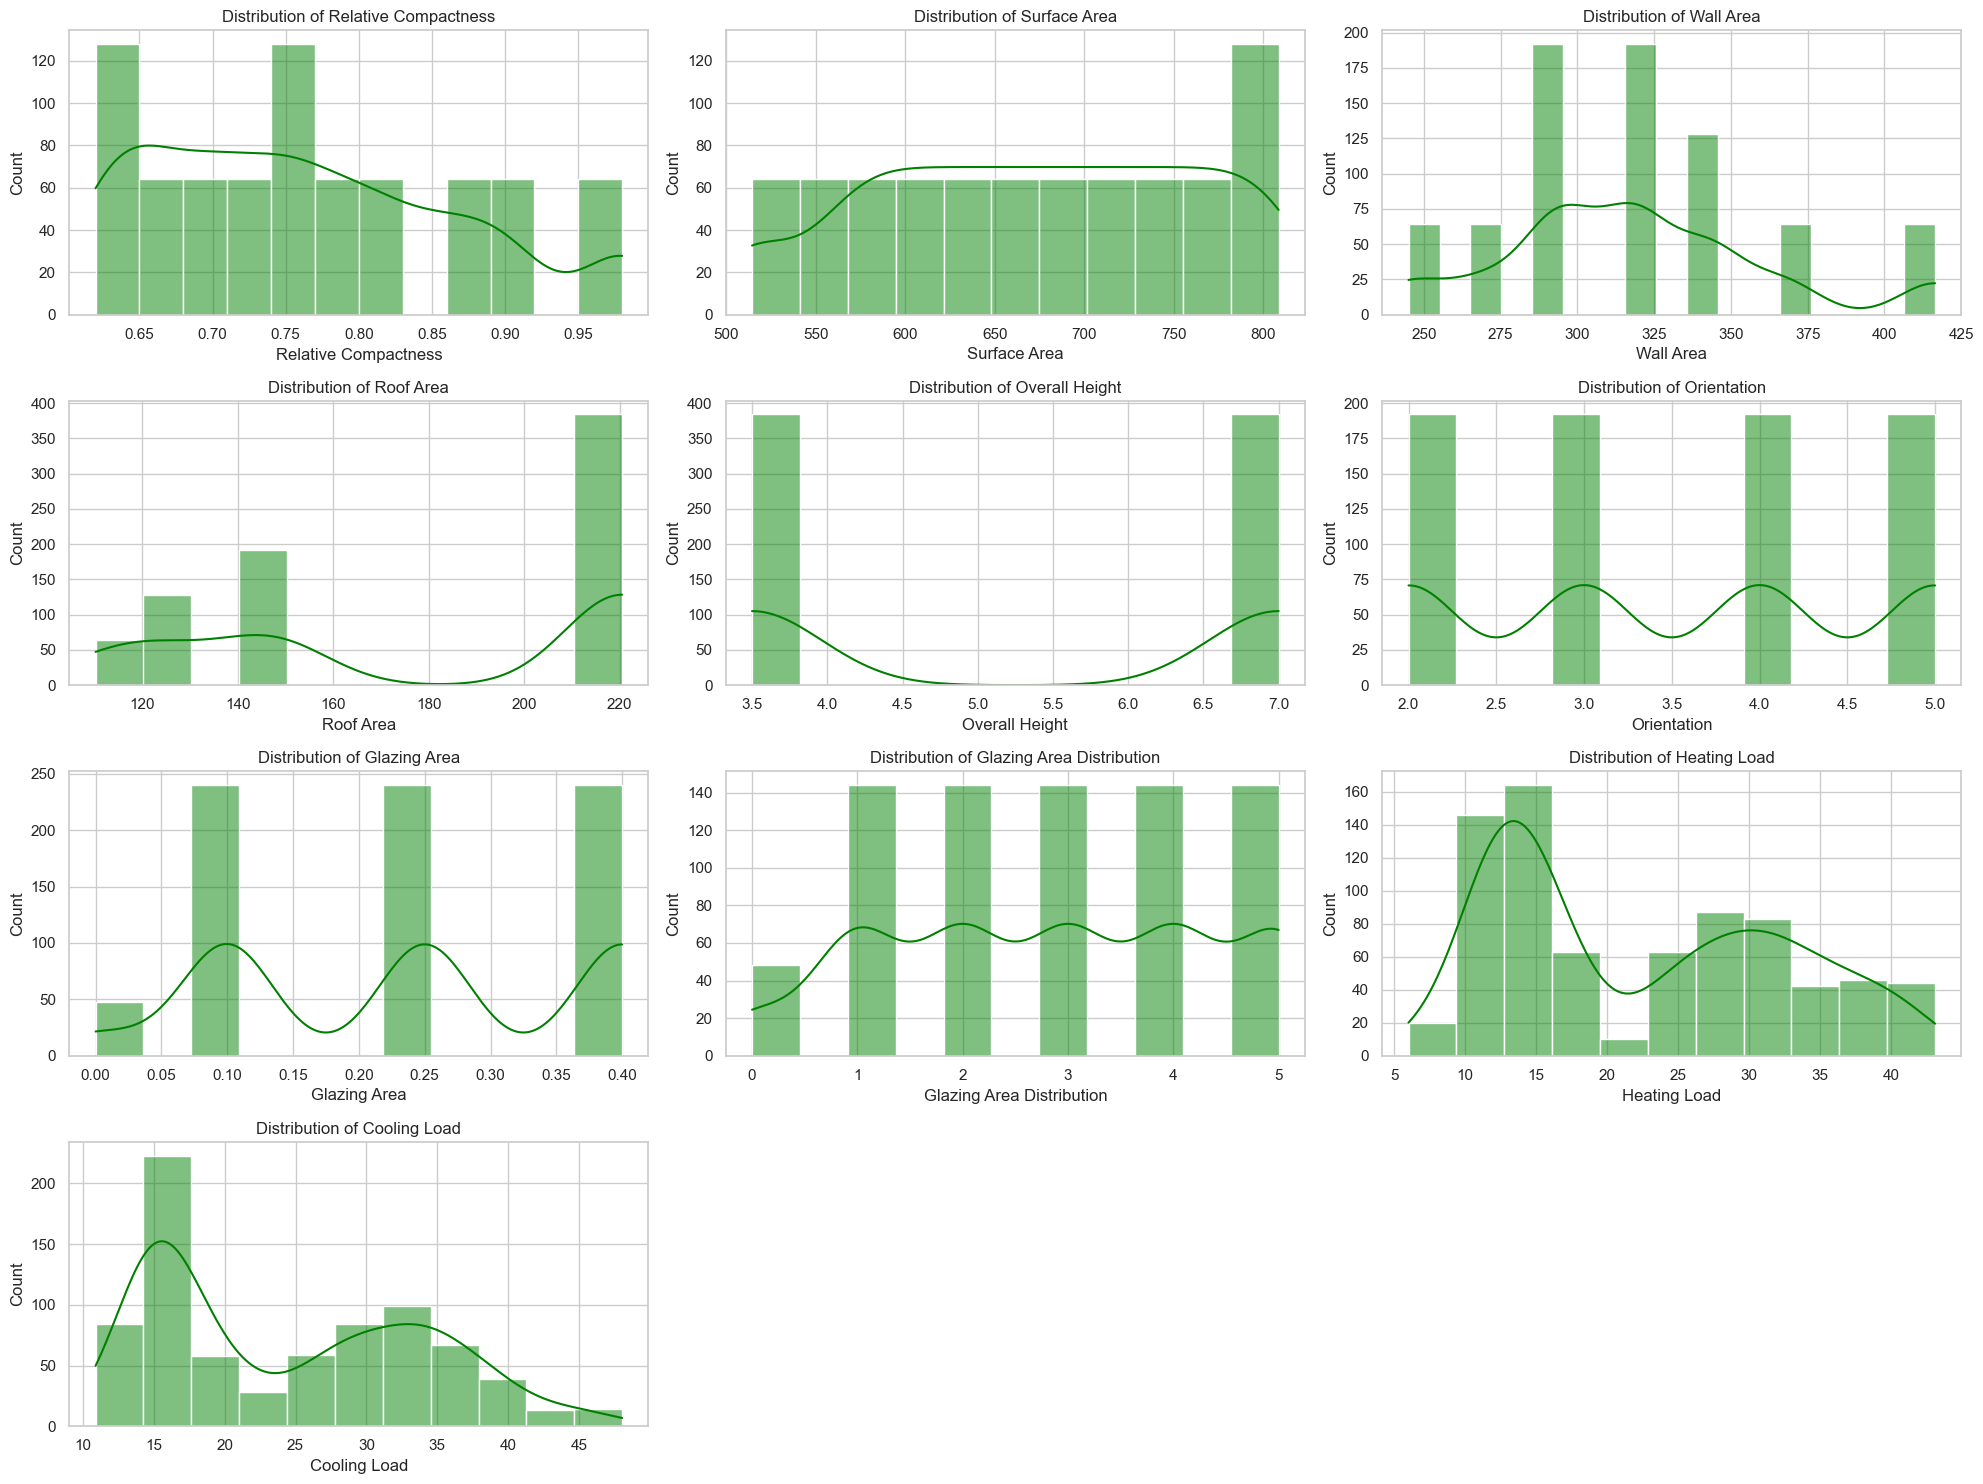

In [10]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting histograms for each feature in the dataset
plt.figure(figsize=(20, 15))
for i, column in enumerate(data.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[column], kde=True, color='green')
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

The histograms provide a view of the distribution of each feature (X1 to X8) and the target variables (Y1 and Y2). Here are some observations:

**'Relative Compactness', 'Surface Area', 'Wall Area', and 'Roof Area':** These features seem to have distinct groupings or discrete values, suggesting specific categories or types within these variables.

**'Orientation' and 'Heating Load':** Show a uniform or near uniform distribution across their respective ranges.

**'Glazing Area':** Appears to have a uniform distribution representing possibly categorical or discrete numerical values.

**'Glazing Area Distribution':** Displays a few distinct peaks, which might represent specific categories or settings.

**'Heating Load' and 'Cooling Load' (Target Variables):** Both target variables show a wide range of values with multiple peaks, indicating varying building energy efficiency outputs.

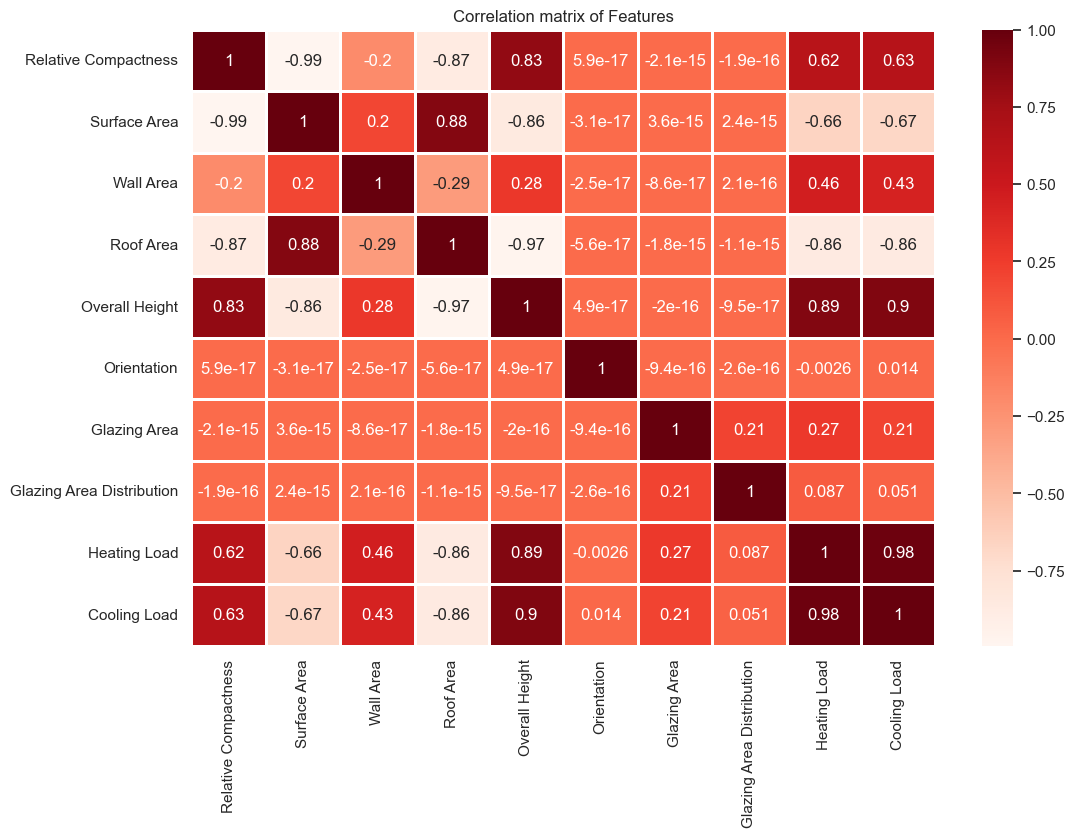

In [11]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', linewidths=2)
plt.title("Correlation matrix of Features")
plt.show()

The correlation matrix heatmap provides insights into how each of the variables is related to one another. Here are some key observations:

High Correlation with Target Variables (Y1 and Y2): Several features show a strong correlation with Y1 and Y2. Specifically, X1, X2, X3, and X4 have high negative correlations with both Y1 and Y2. This suggests that as these features increase, the building energy efficiency (as depicted by Y1 and Y2) tends to decrease. X5 shows moderate correlation with the target variables, while X7 shows a positive correlation with both Y1 and Y2.

Inter-feature Correlations: Some features are highly correlated with each other. For example, X1 has a strong negative correlation with X2, X3, and X4. This might indicate a redundancy or a derived relationship among these features, which is important for any modeling or multivariate analysis. X7 and X8 show relatively low correlation with most other features, suggesting they provide unique information not captured by other features.

**Data Preprocessing**

In [12]:
# Splitting the dataset into Dependent and Independent Variables 
X = data.drop(columns=['Heating Load', 'Cooling Load'])  # Features/Independent Variable
Y = data[['Heating Load', 'Cooling Load']]  # Targets/Dependent Variable

In [13]:
# Splitting the dataset into trainig and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

**MODEL BUILDING**

In [14]:
# Linear Regression
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
Y_pred_linear = linear_model.predict(X_test)

In [15]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, Y_train)
Y_pred_rf = rf_model.predict(X_test)

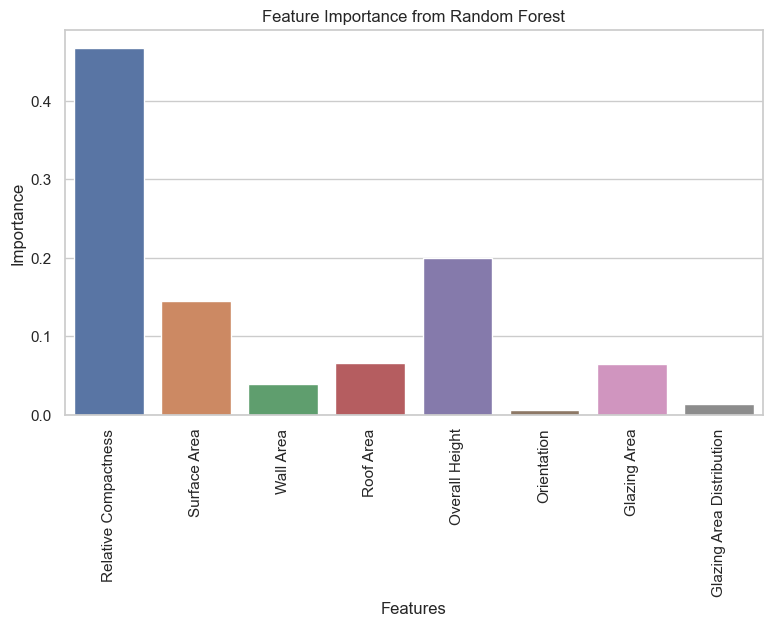

In [17]:
# Feature Importance
feature_importance = rf_model.feature_importances_
plt.figure(figsize=(9, 5))
sns.barplot(x=X.columns, y=feature_importance)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

**Satistical Analysis Of The Models**

In [18]:
# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def evaluate_model(y_true, y_pred):
    return {
        "Mean Absolute Error": mean_absolute_error(y_true, y_pred),
        "Mean Squared Error": mean_squared_error(y_true, y_pred),
        "R-squared": r2_score(y_true, y_pred)
    }

In [19]:
# Evaluation for Linear Regression
print("Linear Regression Evaluation: ") 
linear_regression_eval = evaluate_model(Y_test, Y_pred_linear)
for key, value in linear_regression_eval.items():
    print(f'{key}:  {value}')

Linear Regression Evaluation: 
Mean Absolute Error:  2.192876882298772
Mean Squared Error:  9.54142060394137
R-squared:  0.9025020878061842


In [20]:
# Evaluation for Random Forest Regression
print("Random Forest Regression Evaluation: ") 
random_forest_eval = evaluate_model(Y_test, Y_pred_rf)
for key, value in random_forest_eval.items():
    print(f'{key}:  {value}')

Random Forest Regression Evaluation: 
Mean Absolute Error:  0.755403896103896
Mean Squared Error:  1.9336714593506497
R-squared:  0.9792770313347208


**Visualization of Model Performance**

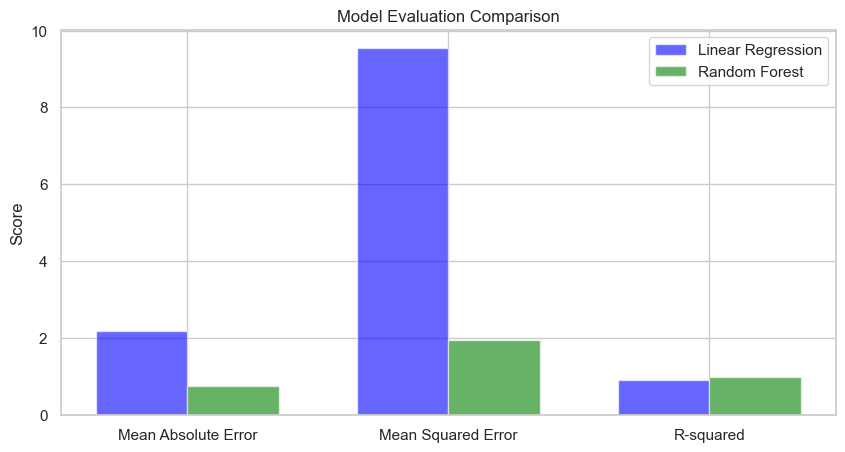

In [21]:
metrics = ["Mean Absolute Error", "Mean Squared Error", "R-squared"]
lr_values = [linear_regression_eval[metric] for metric in metrics]
rf_values = [random_forest_eval[metric] for metric in metrics]

# Setting the positions,width and figsize for the bars
pos = np.arange(len(metrics))
bar_width = 0.35
plt.figure(figsize=(10, 5))

# Plotting Evaluation bars for Linear Regression and Random Forest
plt.bar(pos, lr_values, bar_width, label='Linear Regression', color='blue', alpha=0.6)
plt.bar(pos + bar_width, rf_values, bar_width, label='Random Forest', color='green', alpha=0.6)

# Labels and Legends
plt.xticks(pos + bar_width / 2, metrics)
plt.ylabel('Score')
plt.title('Model Evaluation Comparison')
plt.legend()

plt.show()

**Mean Absolute Error (MAE):**
This is the average of the absolute errors between the predicted and actual values. Lower values are better.
The MAE for Linear Regression is higher (2.19) compared to the Random Forest (0.76), indicating that on average, the Linear Regression predictions are further from the actual values.

**Mean Squared Error (MSE):**
This is similar to MAE but squares the difference before averaging, thus penalizing larger errors more severely. Again, lower values are better. The MSE is significantly lower for Random Forest (1.93) compared to Linear Regression (9.54), indicating that the Random Forest model has fewer large errors in its predictions.

**R-squared (R²):**
This represents the proportion of the variance in the dependent variable that is predictable from the independent variables. It is a measure of how well the regression predictions approximate the real data points. An R² of 1 indicates that the regression predictions perfectly fit the data. In your case, the R-squared is higher for Random Forest (0.979) than for Linear Regression (0.902), indicating a better fit to the data.

**Conclusion from Metrics:**  The Random Forest Regression model performs significantly better than the Linear Regression model on all three metrics. It's more accurate (lower MAE and MSE) and explains a higher proportion of the variance (higher R squared). By considering the difference in the  performance the relationship between features and targets in the data might be non-linear or too complex for a simple Linear Regression model to capture effectively.

**Final Conclusion:**   So, if the primary goal is predictive accuracy and handling complex relationships in data, the Random Forest model is recommended based on the current analysis. We can continue exploring other models, especially if interpretability or computational efficiency is a concern, or if further improvements in predictive performance are desired.